<a href="https://colab.research.google.com/github/menghsinliu/ce888/blob/master/lab4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [2]:
data1 = pd.read_excel("/content/movies_latent_factors.xlsx",sheet_name='Users',index_col='User')
data2 = pd.read_excel("/content/movies_latent_factors.xlsx", sheet_name="Items", index_col='Movie ID')

In [3]:
data1

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
User,,,,,,,,,,,,,,,
4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669
783,-0.020301,-0.031919,-0.036955,0.033690,0.000174,-0.003178,0.054474,0.045424,-0.053308,0.003437,-0.041750,0.059725,-0.021647,0.039873,-0.061857
3878,-0.091462,0.215879,-0.180453,0.085408,-0.321094,0.227947,0.053767,0.038017,0.097141,-0.139872,0.029253,0.214467,0.189250,0.065990,0.102776
768,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.006670
4469,-0.030528,-0.011537,-0.042822,-0.014378,0.031338,0.012297,-0.000038,-0.010264,-0.006781,-0.019950,-0.014435,0.010926,0.024400,0.005318,-0.007983


In [6]:
#data2 = data2.drop(data2.columns[0], axis = 1)
data2

,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
Movie ID,,,,,,,,,,,,,,,,
11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9806,The Incredibles (2004),0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
10020,Beauty and the Beast (1991),1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
36657,X-Men (2000),0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790


In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv",header = None)

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [7]:
df = data.drop(data.columns[0], axis = 1)

In [8]:
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [9]:
df = df.replace(99.00, np.nan)
data1 = data1.replace(99.00, np.nan)
data2 = data2.replace(99.00, np.nan)

In [10]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,16452.000000,18184.000000,16642.000000,15608.000000,24977.000000,20431.000000,24976.000000,24981.000000,15752.000000,20324.000000,...,9672.000000,9889.000000,9988.000000,10200.000000,10265.000000,10370.000000,10520.000000,10666.000000,10910.000000,9943.000000
mean,0.904573,0.208460,0.316574,-1.449114,0.403556,1.594447,-0.429662,-0.624085,-0.557031,1.301231,...,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
std,5.171798,5.597327,5.399806,5.234654,5.255700,4.900540,5.495931,4.929144,5.162224,5.087359,...,5.060445,5.127291,4.611339,5.140307,5.167043,4.852069,5.025076,5.393833,5.176806,5.300409
min,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,-2.670000,-4.420000,-4.030000,-5.870000,-3.690000,-1.310000,-5.290000,-4.610000,-4.760000,-2.090000,...,-0.932500,-2.380000,-0.100000,-2.280000,-2.570000,-1.347500,-1.170000,-3.400000,-4.170000,-2.330000
50%,1.600000,0.830000,0.780000,-1.460000,1.120000,2.230000,-0.050000,-0.290000,-0.190000,1.940000,...,2.860000,1.800000,3.160000,1.750000,1.650000,2.140000,2.480000,1.460000,0.290000,2.140000
75%,4.900000,4.820000,4.660000,2.520000,4.470000,5.440000,3.880000,3.060000,3.300000,5.390000,...,6.120000,5.290000,6.070000,5.290000,5.100000,5.277500,5.630000,5.150000,3.980000,5.730000
max,9.370000,9.370000,9.370000,9.370000,9.370000,9.470000,9.610000,9.760000,9.900000,9.370000,...,9.560000,9.420000,9.370000,9.420000,9.370000,9.370000,9.370000,9.370000,9.370000,9.370000


In [16]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(orig))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [17]:
arr = df.values
arr1 = data1.values
arr2 = data2.values

In [18]:
new_arr, idx = replace(arr, 0.1)
new_arr1, idx = replace(arr1,0.1)
new_arr2, idx = replace(arr2, 0.1)

In [19]:
arr[idx[0][0], idx[1][0]]


7.09

In [20]:
new_arr[idx[0][0], idx[1][0]]

7.09

In [32]:
n_latent_factors = 2

# Initialise as random values
latent_user_preferences = np.random.random((new_arr2.shape[0], n_latent_factors))
latent_item_features = np.random.random((new_arr2.shape[1], n_latent_factors))

In [33]:
latent_item_features

array([[0.188, 0.388],
       [0.144, 0.612],
       [0.639, 0.775],
       [0.495, 0.559],
       [0.778, 0.994],
       [0.902, 0.819],
       [0.499, 0.862],
       [0.255, 0.928],
       [0.208, 0.591],
       [0.426, 0.053],
       [0.04 , 0.607],
       [0.257, 0.714],
       [0.389, 0.873],
       [0.757, 0.676],
       [0.44 , 0.82 ]])

In [34]:
latent_user_preferences

array([[0.203, 0.555],
       [0.136, 0.293],
       [0.259, 0.36 ],
       [0.978, 0.307],
       [0.832, 0.431],
       [0.665, 0.286],
       [0.226, 0.367],
       [0.819, 0.724],
       [0.604, 0.442],
       [0.682, 0.767],
       [0.714, 0.863],
       [0.486, 0.316],
       [0.696, 0.402],
       [0.943, 0.202],
       [0.771, 0.01 ],
       [0.956, 0.903],
       [0.852, 0.267],
       [0.207, 0.096],
       [0.991, 0.112],
       [0.568, 0.1  ],
       [0.345, 0.316],
       [0.265, 0.21 ],
       [0.196, 0.712],
       [0.323, 0.892],
       [0.044, 0.37 ],
       [0.04 , 0.743],
       [0.714, 0.049],
       [0.176, 0.151],
       [0.89 , 0.026],
       [0.043, 0.35 ],
       [0.511, 0.91 ],
       [0.931, 0.264],
       [0.884, 0.807],
       [0.391, 0.193],
       [0.682, 0.195],
       [0.039, 0.92 ],
       [0.758, 0.306],
       [0.192, 0.13 ],
       [0.065, 0.435],
       [0.275, 0.655],
       [0.926, 0.515],
       [0.127, 0.983],
       [0.243, 0.948],
       [0.2

In [24]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err

In [35]:
def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = new_arr2[user_id, item_id]
                if not np.isnan(rating) and rating != 99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 1) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=0.397863
Iteration 1/10:	MSE=0.396274
Iteration 2/10:	MSE=0.394695
Iteration 3/10:	MSE=0.393126
Iteration 4/10:	MSE=0.391566
Iteration 5/10:	MSE=0.390017
Iteration 6/10:	MSE=0.388477
Iteration 7/10:	MSE=0.386947
Iteration 8/10:	MSE=0.385426
Iteration 9/10:	MSE=0.383914


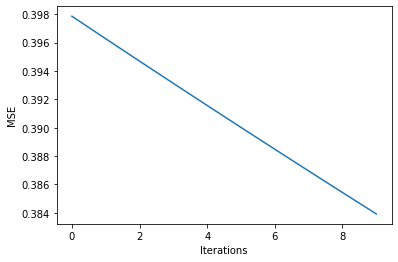

In [40]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [36]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.254, 0.369, 0.56 , ..., 0.564, 0.529, 0.545],
       [0.139, 0.199, 0.314, ..., 0.309, 0.301, 0.3  ],
       [0.188, 0.258, 0.445, ..., 0.415, 0.439, 0.409],
       ...,
       [0.192, 0.237, 0.497, ..., 0.417, 0.519, 0.423],
       [0.196, 0.288, 0.429, ..., 0.437, 0.402, 0.421],
       [0.329, 0.375, 0.904, ..., 0.707, 0.977, 0.734]])

In [37]:
values = [zip(new_arr2[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)


In [38]:
data2

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
Movie ID,,,,,,,,,,,,,,,
11,-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
12,-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
13,-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
14,-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
22,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9806,0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
10020,1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
36657,0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790


In [39]:
comparison_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"(-1.5218476932977845, 0.25373256627738433)","(-1.0385074424076217, 0.3692530592637363)","(2.0272691992004397, 0.5604085826881384)","(0.24793252416549907, 0.411027363318781)","(-0.5945476708705433, 0.7103756536243723)","(2.5132599646492184, 0.6382562881476486)","(-1.8489100782588614, 0.5803589112180241)","(0.47670996550851713, 0.5672523844188768)","(-0.22414630395868232, 0.3706975794726415)","(99.0, 0.11616698033830984)","(-0.973915043301705, 0.345463280372777)","(0.8623788058062587, 0.44860387433298393)","(0.4038611510962773, 0.5641110481946034)","(1.129616009775629, 0.5293297204539402)","(99.0, 0.544549489764593)"
1,"(-0.3421850499080402, 0.13932636219818972)","(-0.2965864805915901, 0.19909016519007366)","(-0.3859624346716409, 0.31400675393955946)","(2.443297472760282, 0.23105378833862905)","(99.0, 0.39714405636414796)","(-0.6194650336224766, 0.36254333780092474)","(0.5728872515470455, 0.32060437334808223)","(0.32951639764434587, 0.3067980962805538)","(-0.7122275724503553, 0.2016464808733697)","(0.323554166872264, 0.07337669431108162)","(-0.5619483742932716, 0.18357160370505646)","(-0.14240540452435274, 0.24417644301278676)","(-0.564414727898898, 0.3089103584030428)","(0.5068760116906501, 0.3009100552245474)","(99.0, 0.3000052688607578)"
2,"(-2.240887934508497, 0.18848473299573865)","(-0.43881534655888726, 0.2578019534517883)","(-2.275177308251021, 0.44454352097513034)","(0.6145483150345445, 0.329409743389131)","(0.9044694087071705, 0.5594949460454207)","(0.7119192012943475, 0.5284031925269573)","(-0.4208759822211417, 0.43977378808765194)","(1.3020362870925513, 0.40032241156936005)","(-0.8684184400310501, 0.26680183768159277)","(-0.16012176721660587, 0.1294037854342134)","(0.6336672656965909, 0.229090398089177)","(99.0, 0.3235551617751216)","(-0.3302756915483635, 0.415240545964846)","(-2.209004313706874, 0.4393005837854888)","(-0.4190918295482105, 0.4089651278805646)"
3,"(-0.6345314311929691, 0.30340345744414776)","(2.186059153511699, 0.3290298177791823)","(99.0, 0.8627451753177783)","(0.08619684362940656, 0.6557074121353828)","(0.5175578623125866, 1.0662718028355018)","(-0.18531850015540424, 1.1333604406186806)","(-0.41235217259040324, 0.7529993918225864)","(0.06384113478497681, 0.5346705343140987)","(0.07593652973833777, 0.3848177444976926)","(-0.5776818744121281, 0.4329121054621298)","(0.526803358487583, 0.2252949096502123)","(-1.4655569127924588, 0.4703420556308259)","(99.0, 0.6485699341829996)","(0.5490104187005649, 0.9472771939360706)","(-0.681191273804317, 0.6814835286000264)"
4,"(0.5173475586768793, 0.32374956652818093)","(-1.4567626410028327, 0.38345746076334564)","(0.36916090223088244, 0.8651903846824438)","(0.07390276058022058, 0.6524419064413217)","(-0.09833225223695237, 1.0754037587194625)","(-0.5947220240422652, 1.1028871124521333)","(0.8288875702136411, 0.7865155558095455)","(0.03362567864625381, 0.61183976202441)","(-0.7074141036790657, 0.42743597983224085)","(0.7178766145466209, 0.37737279604484353)","(1.3943263531484733, 0.2944227100361778)","(-0.7869860436664962, 0.5208911406789466)","(1.4291911303067852, 0.6995335854659982)","(0.8557464952619069, 0.9203855829218702)","(-2.2925659870564994, 0.7184583681207959)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(0.15996660763259896, 0.4140166594348676)","(-0.051122721795121756, 0.6194048467412521)","(0.3111834242907072, 0.8854984651157422)","(1.841866944726751, 0.646018620517838)","(-1.952735549127169, 1.1265666176015094)","(-0.83604142409656, 0.9858676077676929)","(0.6392523489696652, 0.9381114192955415)","(-0.41308168151509395, 0.9471537542093224)","(-0.3108683437172227, 0.6136448259372842)","(99.0, 0.14540632153873953)","(-0.8460443621255236, 0.591891234674496)","(99.0, 0.7419109761842331)","(-0.64916357115908, 0.9243623491748595)","(0.04557974495616067, 0.8165147861909653)","(1.0178609976760122, 0.8839896906672978)"
96,"(1.286287808443006, 0.24094753359386742)","(0.0049572334841235495, 0.3210092515

In [31]:
comparison_data.iloc[21620, 10]

(-0.39, 0.10986562388363906)